In [1]:
import pandas as pd
import numpy as np
import os

In [8]:
file = r"E:\datasets\WISDM_Dataset\WISDM_ar_v1.1_raw.txt"
col_names    =  ['sub','activity_id','timestamp', 'acc_x', 'acc_y', 'acc_z']
df_all = pd.read_csv(file,header=None,names=col_names)
df_all["acc_z"]=df_all["acc_z"].replace('\;','',regex=True).astype(float)

In [25]:
used_cols    = [0,1,3,4,5]
df_all = pd.read_csv(file,header=None,names=col_names)
df_all["acc_z"]=df_all["acc_z"].replace('\;','',regex=True).astype(float) #清洗掉z-axis中的符号
df_all =df_all.iloc[:,used_cols]
df_all.dropna(inplace=True)

df_all['act_block'] = ( (df_all['sub'].shift(1) != df_all['sub'])).astype(int).cumsum()
sub_id_list = []


In [26]:
for index in df_all.act_block.unique():
    temp_df = df_all[df_all["act_block"]==index]
    sub = temp_df["sub"].unique()[0]
    sub_id = "{}_{}".format(sub,index)
    sub_id_list.extend([sub_id]*temp_df.shape[0])



df_all["sub_id"] =     sub_id_list
del df_all["act_block"]

In [28]:
df_all

,sub,activity_id,acc_x,acc_y,acc_z,sub_id
0,33,Jogging,-0.694638,12.680544,0.503953,33_1
1,33,Jogging,5.012288,11.264028,0.953424,33_1
2,33,Jogging,4.903325,10.882658,-0.081722,33_1
3,33,Jogging,-0.612916,18.496431,3.023717,33_1
4,33,Jogging,-1.184970,12.108489,7.205164,33_1
...,...,...,...,...,...,...
1098199,19,Sitting,9.000000,-1.570000,1.690000,19_56
1098200,19,Sitting,9.040000,-1.460000,1.730000,19_56
1098201,19,Sitting,9.080000,-1.380000,1.690000,19_56
1098202,19,Sitting,9.000000,-1.460000,1.730000,19_56


<AxesSubplot:>

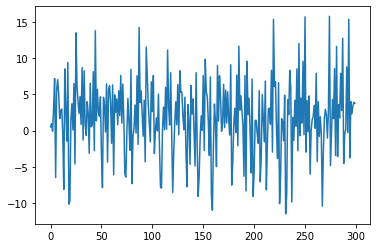

In [20]:
df_all.iloc[:300]["acc_z"].plot()

In [15]:


df_all.sort_values(by=['timestamp'])

,sub,activity_id,timestamp,acc_x,acc_y,acc_z
882376,3,Walking,0,0.00,0.00,0.00
164943,6,Jogging,0,0.00,0.00,0.00
165014,6,Jogging,0,0.00,0.00,0.00
165015,6,Jogging,0,0.00,0.00,0.00
165027,6,Jogging,0,0.00,0.00,0.00
...,...,...,...,...,...,...
1052816,7,Sitting,209397161469000,-6.74,-3.21,6.63
1052817,7,Sitting,209397201539000,-6.85,-3.26,6.63
1052818,7,Sitting,209397241517000,-6.85,-3.30,6.66
1052819,7,Sitting,209397321687000,-7.01,-3.17,6.36


In [7]:
sub_data = pd.DataFrame(np.array(sub_data['sensor_readings']))
sub_data

NameError: name 'sub_data' is not defined

In [1]:
import sys
sys.path.append("../../")

import warnings
warnings.filterwarnings("ignore")
from torch.utils.data import DataLoader
import torch
from dataloaders import data_set,data_dict
import pywt
import yaml
import numpy as np
import os

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   

args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"               # -----------
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"

args.drop_transition  = False

args.batch_size       = 128
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.85

In [3]:

args.data_name           =  "hapt"
args.difference          =  False 
args.filtering           =  False
args.magnitude           =  False
args.weighted_sampler = False

args.wavelet_filtering   = True
args.number_wavelet_filtering = 10

args.datanorm_type       =  "standardization" # None ,"standardization", "minmax"
args.pos_select          = None
args.sensor_select       = None
window_seconds           = 2.56
args.representation_type = "time"
args.exp_mode            = "LOCV"

config_file = open('../../dataconfigs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]
args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.c_in            =  config["num_channels"]

args.input_length    =  args.windowsize
# input information
if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1

In [4]:
dataset = data_dict[args.data_name](args)

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------


In [5]:
# you can find all data 
dataset.data_x


,sub_id,acc_x_1,acc_y_1,acc_z_1,gyro_x_2,gyro_y_2,gyro_z_2,sub
0,1_1,0.918056,-0.112500,0.509722,-0.054978,-0.069639,-0.030849,1
1,1_1,0.911111,-0.093056,0.537500,-0.012523,0.019242,-0.038485,1
2,1_1,0.881944,-0.086111,0.513889,-0.023518,0.276417,0.006414,1
3,1_1,0.881944,-0.086111,0.513889,-0.093462,0.367741,0.001222,1
4,1_1,0.879167,-0.100000,0.505556,-0.124311,0.476780,-0.022907,1
...,...,...,...,...,...,...,...,...
1122767,30_61,0.430556,0.501389,0.923611,-1.154535,-0.653931,0.004276,30
1122768,30_61,0.430556,0.501389,0.923611,-0.858266,-0.429438,0.005803,30
1122769,30_61,0.473611,0.493056,0.906944,-0.268475,-0.193644,0.015577,30
1122770,30_61,0.472222,0.502778,0.884722,0.274278,-0.108734,0.105069,30


In [6]:
dataset.data_y

sub_id
1_1      0
1_1      0
1_1      0
1_1      0
1_1      0
        ..
30_61    0
30_61    0
30_61    0
30_61    0
30_61    0
Name: activity_id, Length: 1122772, dtype: int64

In [7]:
# sliding window are saved in train_slidingwindows with 50%overlap
dataset.train_slidingwindows

[['1_1', 217, 345],
 ['1_1', 281, 409],
 ['1_1', 345, 473],
 ['1_1', 409, 537],
 ['1_1', 473, 601],
 ['1_1', 537, 665],
 ['1_1', 601, 729],
 ['1_1', 665, 793],
 ['1_1', 729, 857],
 ['1_1', 793, 921],
 ['1_1', 857, 985],
 ['1_1', 921, 1049],
 ['1_1', 985, 1113],
 ['1_1', 1049, 1177],
 ['1_1', 1113, 1241],
 ['1_1', 1177, 1305],
 ['1_1', 1241, 1369],
 ['1_1', 1305, 1433],
 ['1_1', 1369, 1497],
 ['1_1', 1433, 1561],
 ['1_1', 1497, 1625],
 ['1_1', 1561, 1689],
 ['1_1', 1625, 1753],
 ['1_1', 1689, 1817],
 ['1_1', 1753, 1881],
 ['1_1', 1817, 1945],
 ['1_1', 1881, 2009],
 ['1_1', 1945, 2073],
 ['1_1', 2009, 2137],
 ['1_1', 2073, 2201],
 ['1_1', 2137, 2265],
 ['1_1', 2201, 2329],
 ['1_1', 2265, 2393],
 ['1_1', 2329, 2457],
 ['1_1', 2393, 2521],
 ['1_1', 2457, 2585],
 ['1_1', 2521, 2649],
 ['1_1', 2585, 2713],
 ['1_1', 2649, 2777],
 ['1_1', 2713, 2841],
 ['1_1', 2777, 2905],
 ['1_1', 2841, 2969],
 ['1_1', 2905, 3033],
 ['1_1', 2969, 3097],
 ['1_1', 3033, 3161],
 ['1_1', 3097, 3225],
 ['1_1', 316

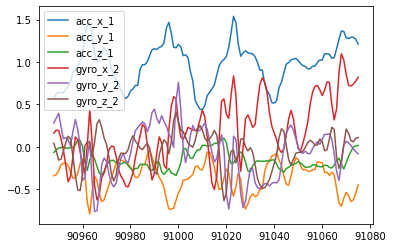

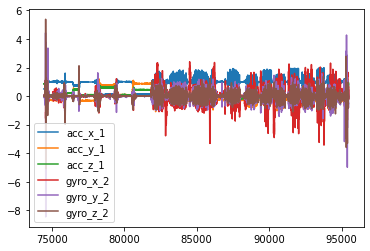

In [8]:
import matplotlib.pyplot as plt
index= 1000
# get a window
sub_id ,window_start,windwow_end= dataset.train_slidingwindows[index]
data_of_this_sub_id = dataset.data_x[dataset.data_x["sub_id"]==sub_id]
window_data = data_of_this_sub_id.loc[window_start:windwow_end-1,:]
# 这里是window的可视化
window_data.iloc[:,1:-1].plot();
# 这里是整的一段
data_of_this_sub_id.iloc[:,1:-1].plot();

In [9]:
from torch.utils.data import DataLoader
print("================ {} Mode ====================".format(dataset.exp_mode))
print("================ {} CV ======================".format(dataset.num_of_cv))
for i in range(dataset.num_of_cv):
    dataset.update_train_val_test_keys()
    train_data  = data_set(args,dataset,"train")
    test_data  = data_set(args,dataset,"test")
    vali_data  = data_set(args,dataset,"vali")
    
    
        # form the dataloader
    train_data_loader = DataLoader(train_data,  
                                    batch_size   =  args.batch_size,
                                    shuffle      =  args.shuffle,
                                    num_workers  =  0,
                                    drop_last    =  args.drop_last)

    vali_data_loader = DataLoader(vali_data,  
                                    batch_size   =  args.batch_size,
                                    shuffle      =  args.shuffle,
                                    num_workers  =  0,
                                    drop_last    =  args.drop_last)

    test_data_loader = DataLoader(test_data,  
                                    batch_size   =  args.batch_size,
                                    shuffle      =  args.shuffle,
                                    num_workers  =  0,
                                    drop_last    =  args.drop_last)
    
    
    for i, (batch_x1,batch_x2,batch_y) in enumerate(train_data_loader):
        print("get ")
        break
    break

================ LOCV Mode ====================
================ 10 CV ======================
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.00070028 0.00072254 0.00078186 0.00065359 0.00059418 0.0006035
 0.00793651 0.01086957 0.00649351 0.00787402 0.00591716 0.00740741]
Train data number :  9764
The number of classes is :  12
The input_length  is :  128
The channel_in is :  6
Test data number :  6632
Validation data number :  1724
get 


In [10]:
batch_x1.shape

torch.Size([128, 51, 128, 6])

In [13]:
used_cols = [0]+[2 + s * 7 for s in range(10)] + [3 + s *7 for s in range(10)] + [4 + s *7 for s in range(10)]
used_cols.sort()

# there are total 30 sensors 
col_names = ["acc_x","acc_y", "acc_z"]
col_names    =  ["activity_id"] + [j  for k in [[item+"_"+str(i) for item in col_names] for i in range(1,11)] for j in k ]

In [16]:
import scipy.io as sio
import os
import pandas as pd
import numpy as np
root_path = r"E:\datasets\Skoda HAR Dataset"
data_dict = sio.loadmat(file_name=os.path.join(root_path,"right_classall_clean.mat"), squeeze_me=True)
df_all = data_dict[list(data_dict.keys())[3]]

df_all = df_all[:, used_cols]
df_all = pd.DataFrame(df_all,columns=col_names)

df_all["sub_id"] = 1
df_all["sub"] = 1

# Downsampling!
df_all.reset_index(drop=True,inplace=True)
print(df_all.shape)
index_list = list(np.arange(0,df_all.shape[0],3))
df_all = df_all.iloc[index_list]
print(df_all.shape)

(705904, 33)
(235302, 33)


In [7]:
        data_dict = sio.loadmat(file_name=os.path.join(root_path,"right_classall_clean.mat"), squeeze_me=True)
        df_all = data_dict[list(data_dict.keys())[3]]

        df_all = df_all[:, self.used_cols]
        df_all = pd.DataFrame(df_all,columns=self.col_names)

        df_all["sub_id"] = 1
        df_all["sub"] = 1

        # Downsampling!
        df_all.reset_index(drop=True,inplace=True)
        index_list = list(np.arange(0,df_all.shape[0],3))
        df_all = df_all.iloc[index_list]

In [9]:
df_all.

(705904, 71)